In [7]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [9]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../../../..")

print('Current location: ', os.getcwd())

Current location:  /home/denys_herasymuk/Research/NYU/Code/fairness-variance


# Visualizations

In [10]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_bar_plot_for_model_selection

## Initialize Configs

In [11]:
DB_COLLECTION_NAME = 'one_repair_lvl_many_models'
EXPERIMENT_SESSION_UUID = '45fc7ac3-18e1-4c93-8fd3-f144427b9fc4'
SENSITIVE_ATTRS = ['sex']
SENSITIVE_ATTR_FOR_INTERVENTION = 'sex'
# MODEL_NAMES = ['LogisticRegression']
MODEL_NAMES = ['LGBMClassifier', 'LogisticRegression', 'RandomForestClassifier', 'MLPClassifier']

In [12]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [13]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [14]:
# Append Test_Set_Index to each result set for models
for model_name in models_metrics_dct.keys():
    models_metrics_dct[model_name]['Test_Set_Index'] = 0

In [15]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(19, 21)

In [16]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,Dataset_Split_Seed,...,Fair_Intervention_Params_Lst,Intervention_Param,overall,sex_dis,sex_dis_correct,sex_dis_incorrect,sex_priv,sex_priv_correct,sex_priv_incorrect,Test_Set_Index
0,Accuracy,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'sex_binary'},Student_Performance_Por,20,OK,2024-01-08 06:23:11.716,45fc7ac3-18e1-4c93-8fd3-f144427b9fc4,Exp_iter_1,100,...,['debiased_classifier'],debiased_classifier,0.914110,0.936170,1.000000,0.000000,0.884058,1.000000,0.000000,0
1,Aleatoric_Uncertainty,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'sex_binary'},Student_Performance_Por,20,OK,2024-01-08 06:23:11.716,45fc7ac3-18e1-4c93-8fd3-f144427b9fc4,Exp_iter_1,100,...,['debiased_classifier'],debiased_classifier,0.150840,0.128881,0.104588,0.485173,0.180754,0.141874,0.477220,0
2,Epistemic_Uncertainty,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'sex_binary'},Student_Performance_Por,20,OK,2024-01-08 06:23:11.716,45fc7ac3-18e1-4c93-8fd3-f144427b9fc4,Exp_iter_1,100,...,['debiased_classifier'],debiased_classifier,0.085671,0.070393,0.056290,0.277231,0.106484,0.077514,0.327384,0
3,F1,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'sex_binary'},Student_Performance_Por,20,OK,2024-01-08 06:23:11.716,45fc7ac3-18e1-4c93-8fd3-f144427b9fc4,Exp_iter_1,100,...,['debiased_classifier'],debiased_classifier,0.950704,0.964286,1.000000,0.000000,0.931034,1.000000,0.000000,0
4,FNR,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'sex_binary'},Student_Performance_Por,20,OK,2024-01-08 06:23:11.716,45fc7ac3-18e1-4c93-8fd3-f144427b9fc4,Exp_iter_1,100,...,['debiased_classifier'],debiased_classifier,0.014599,0.024096,0.000000,1.000000,0.000000,0.000000,NaN,0
5,FPR,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'sex_binary'},Student_Performance_Por,20,OK,2024-01-08 06:23:11.716,45fc7ac3-18e1-4c93-8fd3-f144427b9fc4,Exp_iter_1,100,...,['debiased_classifier'],debiased_classifier,0.461538,0.363636,0.000000,1.000000,0.533333,0.000000,1.000000,0
6,IQR,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'sex_binary'},Student_Performance_Por,20,OK,2024-01-08 06:23:11.716,45fc7ac3-18e1-4c93-8fd3-f144427b9fc4,Exp_iter_1,100,...,['debiased_classifier'],debiased_classifier,0.103809,0.079346,0.062930,0.320114,0.137136,0.089034,0.503913,0
7,Jitter,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'sex_binary'},Student_Performance_Por,20,OK,2024-01-08 06:23:11.716,45fc7ac3-18e1-4c93-8fd3-f144427b9fc4,Exp_iter_1,100,...,['debiased_classifier'],debiased_classifier,0.094285,0.072620,0.055203,0.328070,0.123799,0.086799,0.405921,0
8,Label_Stability,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'sex_binary'},Student_Performance_Por,20,OK,2024-01-08 06:23:11.716,45fc7ac3-18e1-4c93-8fd3-f144427b9fc4,Exp_iter_1,100,...,['debiased_classifier'],debiased_classifier,0.865031,0.901064,0.926136,0.533333,0.815942,0.878689,0.337500,0
9,Mean_Prediction,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'sex_binary'},Student_Performance_Por,20,OK,2024-01-08 06:23:11.716,45fc7ac3-18e1-4c93-8fd3-f144427b9fc4,Exp_iter_1,100,...,['debiased_classifier'],debiased_classifier,0.121467,0.106664,0.086676,0.399824,0.141633,0.115554,0.340486,0


In [17]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [18]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

## Figure 1. Subgroup boxplots.

In [19]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [20]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

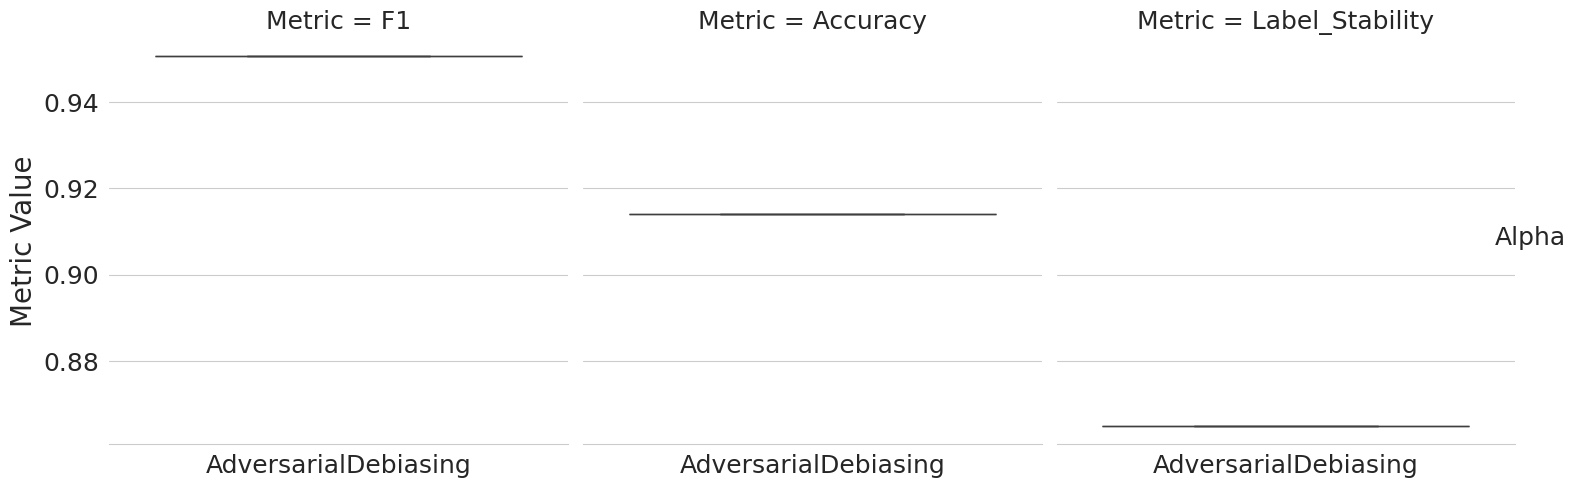

In [21]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           # ylim=(0.75, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

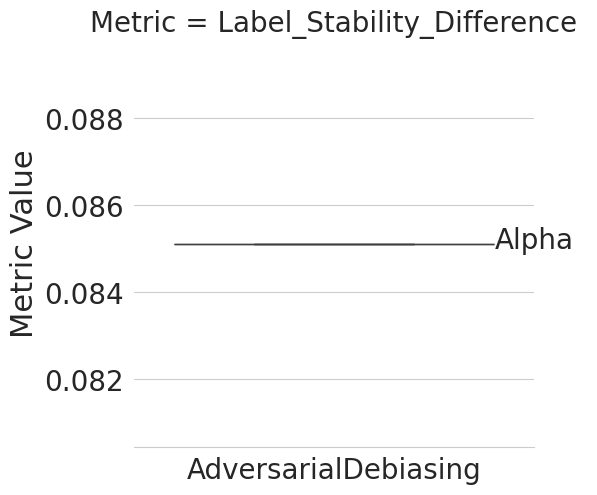

In [22]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Label_Stability_Difference'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

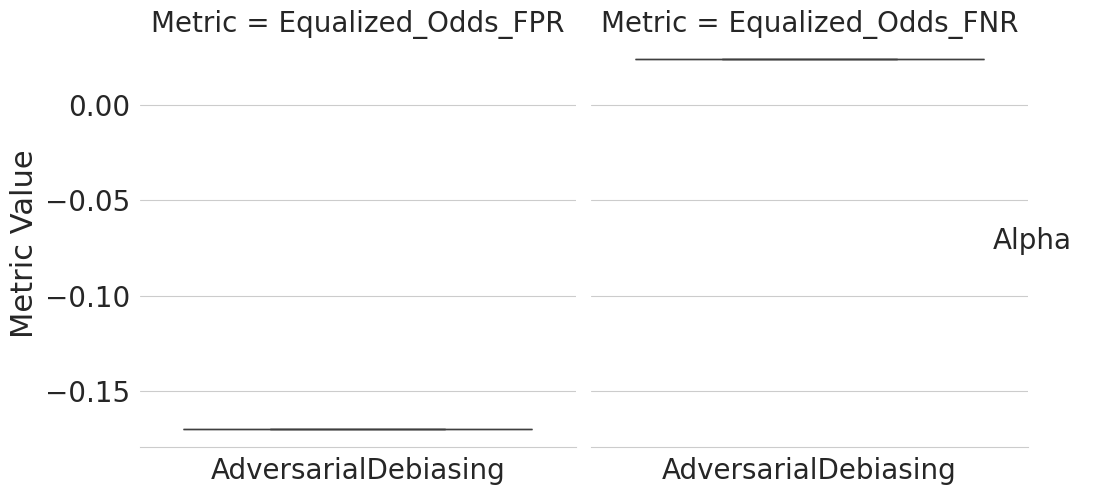

In [23]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

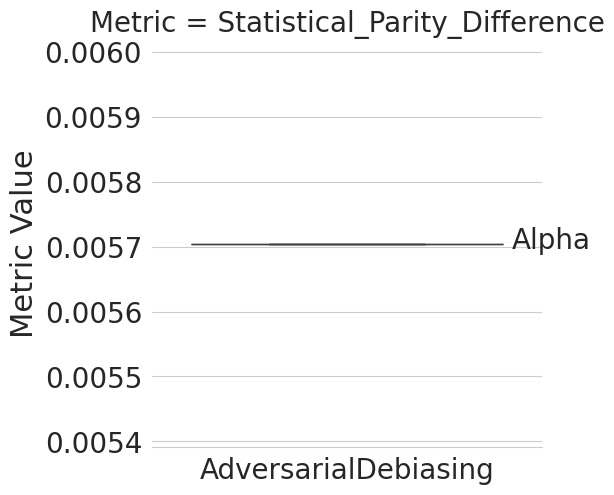

In [24]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Statistical_Parity_Difference'],
                                           vals_to_replace=vals_to_replace)